In [39]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [40]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [41]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [42]:
# Store the feature data
X = data.data
# store the target data
y = data.target
# split the data using Scikit-Learn's train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [43]:
boosting = GradientBoostingClassifier()
boosting.fit(X_train, y_train)

print(f"Gradient boosting training set accuracy: {format(boosting.score(X_train, y_train), '.4f')} ")
print(f"Gradient boosting testing set accuracy: {format(boosting.score(X_test, y_test), '.4f')} ")

Gradient boosting training set accuracy: 1.0000 
Gradient boosting testing set accuracy: 0.9580 


In [44]:
max_boosting = GradientBoostingClassifier(max_depth=1)
max_boosting.fit(X_train, y_train)

print(f"Gradient boosting training set accuracy: {format(max_boosting.score(X_train, y_train), '.4f')} ")
print(f"Gradient boosting testing set accuracy: {format(max_boosting.score(X_test, y_test), '.4f')} ")

Gradient boosting training set accuracy: 0.9906 
Gradient boosting testing set accuracy: 0.9650 


In [45]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_leaf_nodes=6, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_leaf_nodes=6, random_state=42)

In [46]:
from sklearn.model_selection import cross_val_score

cross_val_score(tree_clf, X, y, cv=3, scoring="accuracy")

array([0.88947368, 0.95789474, 0.88888889])

In [47]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_predict = cross_val_predict(tree_clf, X, y, cv=3)
confusion_matrix(y, y_predict)

array([[188,  24],
       [ 26, 331]], dtype=int64)

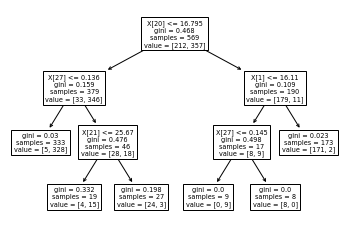

In [48]:
from sklearn import tree 
tree.plot_tree(tree_clf)
plt.show()

In [49]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [50]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5)
gsearch2.fit(X, y)
gsearch2.best_params_

NameError: name 'GridSearchCV' is not defined

In [ ]:
boosting = GradientBoostingClassifier(max_depth=7, min_samples_split=200)
boosting.fit(X_train, y_train)

In [ ]:
print(f"Gradient boosting training set accuracy: {format(boosting.score(X_train, y_train), '.4f')} ")
print(f"Gradient boosting testing set accuracy: {format(boosting.score(X_test, y_test), '.4f')} ")